In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

plt.rcParams["figure.dpi"] = 600

In [2]:
def read1_avg(filename):
    sortList = ["RTS"]
    latencyList = ['Initialization latency', 'Construction latency', 'Traversal latency']
    total = []
    for latency in latencyList:
        res = []
        f = open(filename)
        line = f.readline()
        while line: 
            if latency in line:
                line = line.strip(latency + ": ")
                line = line.strip(" (ms)\n")
                res.append(float(line))
            line = f.readline() 
        f.close() 
        res = list(map(lambda x: round(x/1000, 3), res))
        n = []
        for i in range(0, len(res), 10):
            n.append(round(sum(res[i+3:i+7])/4, 3))   
        total.append(n)
    return total

def read2_avg(filename):
    sortList = ["Elements"]
    latencyList = ['Total RUN', 'Total MERGE']
    total = []
    for latency in latencyList:
        res = []
        f = open(filename)
        line = f.readline()
        while line: 
            if latency in line:
                line = line.strip(latency + ": ")
                line = line.strip(" (ms)\n")
                res.append(float(line))
            line = f.readline() 
        f.close() 
        res = list(map(lambda x: round(x, 3), res))
        n = []
        for i in range(0, len(res), 10):
            n.append(round(sum(res[i+3:i+7])/4, 3))  
        total.append(n)
    return total

def read3_avg(filename):
    sortList = ["IPS4o"]
    latencyList = ['Sorting latency', 'Reading latency']
    total = []
    for latency in latencyList:
        res = []
        f = open(filename)
        line = f.readline()
        while line: 
            if latency in line:
                line = line.strip(latency + ": ")
                line = line.strip(" (ms)\n")
                res.append(float(line))
            line = f.readline() 
        f.close()
        res = list(map(lambda x: round(x/1000, 3), res))
        n = []
        for i in range(0, len(res), 10):
            n.append(round(sum(res[i+3:i+7])/4, 3))   
        total.append(n)
    return total

In [3]:
# get total latency stats (avg, min, max)

def read1(filename):
    sortList = ["RTS"]
    latencyList = ['Initialization latency', 'Construction latency', 'Traversal latency']
    total = []
    for latency in latencyList:
        res = []
        f = open(filename)
        line = f.readline()
        while line: 
            if latency in line:
                line = line.strip(latency + ": ")
                line = line.strip(" (ms)\n")
                res.append(float(line))
            line = f.readline() 
        f.close() 
        res = list(map(lambda x: round(x/1000, 3), res))
        total.append(res)
    return total

def read2(filename):
    sortList = ["Elements"]
    latencyList = ['Total RUN', 'Total MERGE']
    total = []
    for latency in latencyList:
        res = []
        f = open(filename)
        line = f.readline()
        while line: 
            if latency in line:
                line = line.strip(latency + ": ")
                line = line.strip(" (ms)\n")
                res.append(float(line))
            line = f.readline() 
        f.close() 
        res = list(map(lambda x: round(x, 3), res))
        total.append(res)
    return total

def read3(filename):
    sortList = ["IPS4o"]
    latencyList = ['Sorting latency', 'Reading latency']
    total = []
    for latency in latencyList:
        res = []
        f = open(filename)
        line = f.readline()
        while line: 
            if latency in line:
                line = line.strip(latency + ": ")
                line = line.strip(" (ms)\n")
                res.append(float(line))
            line = f.readline() 
        f.close()
        res = list(map(lambda x: round(x/1000, 3), res))
        total.append(res)
    return total


def read1_stats(filename):
    out = []
    total = []
    [l1, l2, l3] = read1(filename)
    for k in range(len(l1)):
        total.append(round(l1[k] + l2[k] + l3[k], 3))
    for k in range(0, len(total), 10):
        avgV = round(sum(total[k+3:k+7])/4, 3)
        minV = round(min(total[k+3:k+7]), 3)
        maxV = round(max(total[k+3:k+7]), 3)
        out.append([(avgV, minV, maxV)])
    return out

def read2_stats(filename):
    out = []
    total = []
    [l1, l2] = read2(filename)
    for k in range(len(l1)):
        total.append(round(l1[k] + l2[k], 3))
    for k in range(0, len(total), 10):
        avgV = round(sum(total[k+3:k+7])/4, 3)
        minV = round(min(total[k+3:k+7]), 3)
        maxV = round(max(total[k+3:k+7]), 3)
        out.append([(avgV, minV, maxV)])
    return out

def read3_stats(filename):
    out = []
    total = []
    [l1, l2] = read3(filename)
    for k in range(len(l1)):
        total.append(round(l1[k] + l2[k], 3))
    for k in range(0, len(total), 10):
        avgV = round(sum(total[k+3:k+7])/4, 3)
        minV = round(min(total[k+3:k+7]), 3)
        maxV = round(max(total[k+3:k+7]), 3)
        out.append([(avgV, minV, maxV)])
    return out

In [4]:
def runall_op(filename1, filename2, filename3, type):
    xname = ['1/25', '1/8', '1/4', '1/2']
    x1 = list(range(len(xname)))

    error_params=dict(elinewidth=0.5,ecolor='grey',capsize=3)
    mpl.rcParams['hatch.linewidth'] = 0.3

    width = 0.28
    x2 = []
    for i in range(len(xname)):
        x2.append(x1[i] + width + 0.01)
    x3 = []
    for i in range(len(xname)):
        x3.append(x2[i] + width + 0.01)
    x = []
    for i in range(len(xname)):
        # x.append(x[i] + width/2 + 0.005)
        x.append(x2[i])

    if type == 'size':
        title = ['(a) 200m', '(b) 400m', '(c) 800m', '(d) 1200m', '(e) 1600m', '(f) 2000m']
        ylim_l = [5, 10, 30, 45, 60, 80]
        ylim = [25, 50, 90, 125, 160, 200]
    else:
        title = ['(a) 100% ordered', '(b) 50% ordered', '(c) 25% ordered', '(d) reversed ordered', '(e) interleaved ordered', '(f) gather & outliers']
        ylim = [73 for _ in range(len(title))]

    # plt.figure(figsize=(8, 6))
    plt.figure(figsize=(8, 4))

    for idx in range(1, len(filename1)+1):
        plt.subplot(2, 3, idx)
        [l1, l2, l3] = read1_avg(filename1[idx-1])
        [w1, w2] = read2_avg(filename2[idx-1])
        [i1, i2] = read3_avg(filename3[idx-1])

        error = [read1_stats(filename1[idx-1]), read2_stats(filename2[idx-1]), read3_stats(filename3[idx-1])]
        error_upper = [[], [], []]
        error_lower = [[], [], []]
        for k in range(len(error)):
            for i in range(len(error[k])):
                error_upper[k].append(error[k][i][0][2]-error[k][i][0][0])
                error_lower[k].append(error[k][i][0][0]-error[k][i][0][1])

        plt.bar(x1, [0 for i in range(len(w1))], width=width, color='#8AAFEA', linewidth=0.8, label='WiscSort')
        plt.bar(x1, [w1[i]+w2[i] for i in range(len(w1))], width=width, color='#8AAFEA', linewidth=0.11, yerr=[error_lower[1], error_upper[1]], error_kw=error_params)        

        plt.bar(x2, [0 for i in range(len(i1))], width=width, color='#E8A2C2', hatch='////////', linewidth=0.8, label='IPS4o')
        plt.bar(x2, [i1[i]+i2[i] for i in range(len(i1))], width=width, color='#E8A2C2', hatch='//', yerr=[error_lower[2], error_upper[2]], error_kw=error_params)

        plt.bar(x3, [0 for i in range(len(l1))], width=width, color='#FFC43F', hatch='\\\\\\\\\\\\\\\\', linewidth=0.8, label='TSort')
        plt.bar(x3, [l1[i]+l2[i]+l3[i] for i in range(len(l1))], width=width, color='#FFC43F', hatch='\\\\', yerr=[error_lower[0], error_upper[0]], error_kw=error_params)

        print(title[idx-1])
        print(f'WiscSort: {[w1[i]+w2[i] for i in range(len(w1))]}')
        print(f'IPS4o: {[i1[i]+i2[i] for i in range(len(i1))]}')
        print(f'TSort: {[l1[i]+l2[i]+l3[i] for i in range(len(l1))]}')

        for i in range(1, len(w1)):
            if w1[i]+w2[i] > ylim[idx-1]:
                if round(w1[i]+w2[i]) < 100:
                    plt.text(x1[i]-0.13, ylim[idx-1]*0.92, round(w1[i]+w2[i]), color='black', size=8)    # weight='bold'
                else:
                    plt.text(x1[i]-0.2, ylim[idx-1]*0.92, round(w1[i]+w2[i]), color='black', size=8)    # weight='bold'

        plt.yticks(range(ylim_l[idx-1], ylim[idx-1]+1, idx*5), size=9)
        plt.xticks(x[1:], xname[1:], size=9)
        if idx == 1 or idx == 4: plt.ylabel('Latency (s)', size=9)
        if idx == 5: plt.xlabel('Relative DRAM space', size=9)
        plt.grid(linestyle='--', axis='y', alpha=0.3)
        plt.ylim(ylim_l[idx-1], ylim[idx-1])
        plt.title(title[idx-1], size=9)
    
    plt.tight_layout()
    plt.legend(ncol=10, bbox_to_anchor=(-0.25, -0.35), handlelength=0.7, handletextpad=0.4, columnspacing=1.3, borderpad=0, frameon=False, fontsize=8.5)
    plt.show()

In [5]:
def runall_op_seperate(filename1, filename2, filename3, type):
    xname = ['1/25', '1/8', '1/4', '1/2']
    x1 = list(range(len(xname)))

    error_params=dict(elinewidth=0.5,ecolor='grey',capsize=3)
    mpl.rcParams['hatch.linewidth'] = 0.3

    colorList = ['#0385D8', '#F45D16', '#FFCD1D']

    width = 0.25
    x2 = []
    for i in range(len(xname)):
        x2.append(x1[i] + width + 0.03)
    x3 = []
    for i in range(len(xname)):
        x3.append(x2[i] + width + 0.03)
    x = []
    for i in range(len(xname)):
        x.append(x2[i])

    if type == 'size':
        title = ['(a) 200m', '(b) 400m', '(c) 800m', '(d) 1200m', '(e) 1600m', '(f) 2000m']
        ylim_l = [5, 10, 30, 45, 60, 80]
        ylim = [25, 50, 90, 125, 160, 200]
    else:
        title = ['(a) 100% ordered', '(b) 50% ordered', '(c) 25% ordered', '(d) reversed ordered', '(e) interleaved ordered', '(f) gather & outliers']
        ylim_l = [10 for _ in range(len(title))]
        ylim = [50 for _ in range(len(title))]

    for idx in range(len(filename1)+1):
        plt.figure(figsize=(2.5, 1.5))

        if idx == 0:
            plt.bar(x1, [0 for i in range(len(xname))], width=width, color=colorList[0], edgecolor='black', linewidth=0.28, label='WiscSort')
            plt.bar(x2, [0 for i in range(len(xname))], width=width, color=colorList[1], edgecolor='black', linewidth=0.28, hatch='////////', label='IPS\u2074o')
            plt.bar(x3, [0 for i in range(len(xname))], width=width, color=colorList[2], edgecolor='black', linewidth=0.28, hatch='\\\\\\\\\\\\\\\\', label='TSort')
            plt.legend(ncol=3, bbox_to_anchor=(0.8, -0.35), handlelength=0.7, handletextpad=0.4, columnspacing=1.3, fontsize=7)
        else:
            [l1, l2, l3] = read1_avg(filename1[idx-1])
            [w1, w2] = read2_avg(filename2[idx-1])
            [i1, i2] = read3_avg(filename3[idx-1])

            error = [read1_stats(filename1[idx-1]), read2_stats(filename2[idx-1]), read3_stats(filename3[idx-1])]
            error_upper = [[], [], []]
            error_lower = [[], [], []]
            for k in range(len(error)):
                for i in range(len(error[k])):
                    error_upper[k].append(error[k][i][0][2]-error[k][i][0][0])
                    error_lower[k].append(error[k][i][0][0]-error[k][i][0][1])

            plt.bar(x1, [w1[i]+w2[i] for i in range(len(w1))], width=width, color=colorList[0], edgecolor='black', linewidth=0.28, yerr=[error_lower[1], error_upper[1]], error_kw=error_params)        
            plt.bar(x2, [i1[i]+i2[i] for i in range(len(i1))], width=width, color=colorList[1], edgecolor='black', linewidth=0.28, hatch='//', yerr=[error_lower[2], error_upper[2]], error_kw=error_params)
            plt.bar(x3, [l1[i]+l2[i]+l3[i] for i in range(len(l1))], width=width, color=colorList[2], edgecolor='black', linewidth=0.28, hatch='\\\\', yerr=[error_lower[0], error_upper[0]], error_kw=error_params)

            for i in range(len(w1)):
                if w1[i]+w2[i] > ylim[idx-1]:
                    if round(w1[i]+w2[i]) < 100:
                        plt.text(x1[i]-0.14, ylim[idx-1]*0.89, round(w1[i]+w2[i]), color='black', size=7)    # weight='bold'
                    else:
                        plt.text(x1[i]-0.21, ylim[idx-1]*0.90, round(w1[i]+w2[i]), color='black', size=7)    # weight='bold'
            if type == 'size':
                plt.yticks(range(ylim_l[idx-1], ylim[idx-1]+1, idx*5), size=7)
            else:
                plt.yticks(range(ylim_l[idx-1], ylim[idx-1]+1, 10), size=7)
            plt.xticks(x, xname, size=7)
            plt.ylabel('Latency (s)', labelpad=1.5, size=7)
            plt.xlabel('Relative DRAM space', labelpad=1, size=7)
            plt.grid(linestyle='--', axis='y', alpha=0.3)
            plt.ylim(ylim_l[idx-1], ylim[idx-1])
        plt.tight_layout()
        # if type == 'size':
        #     plt.savefig('fig/final_uni_'+str(idx)+'.pdf', format='pdf')
        # else:
        #     plt.savefig('fig/final_skew_'+str(idx)+'.pdf', format='pdf')
    
    plt.show()

In [6]:
folder = '20231025_final'
datasize = ['200m', '400m', '800m', '1200m', '1600m', '2000m']
datatype = ['uniform', 'skew_1', 'skew_50', 'skew_25', 'skew_3', 'skew_2', 'skew_200']
date = '20231025'

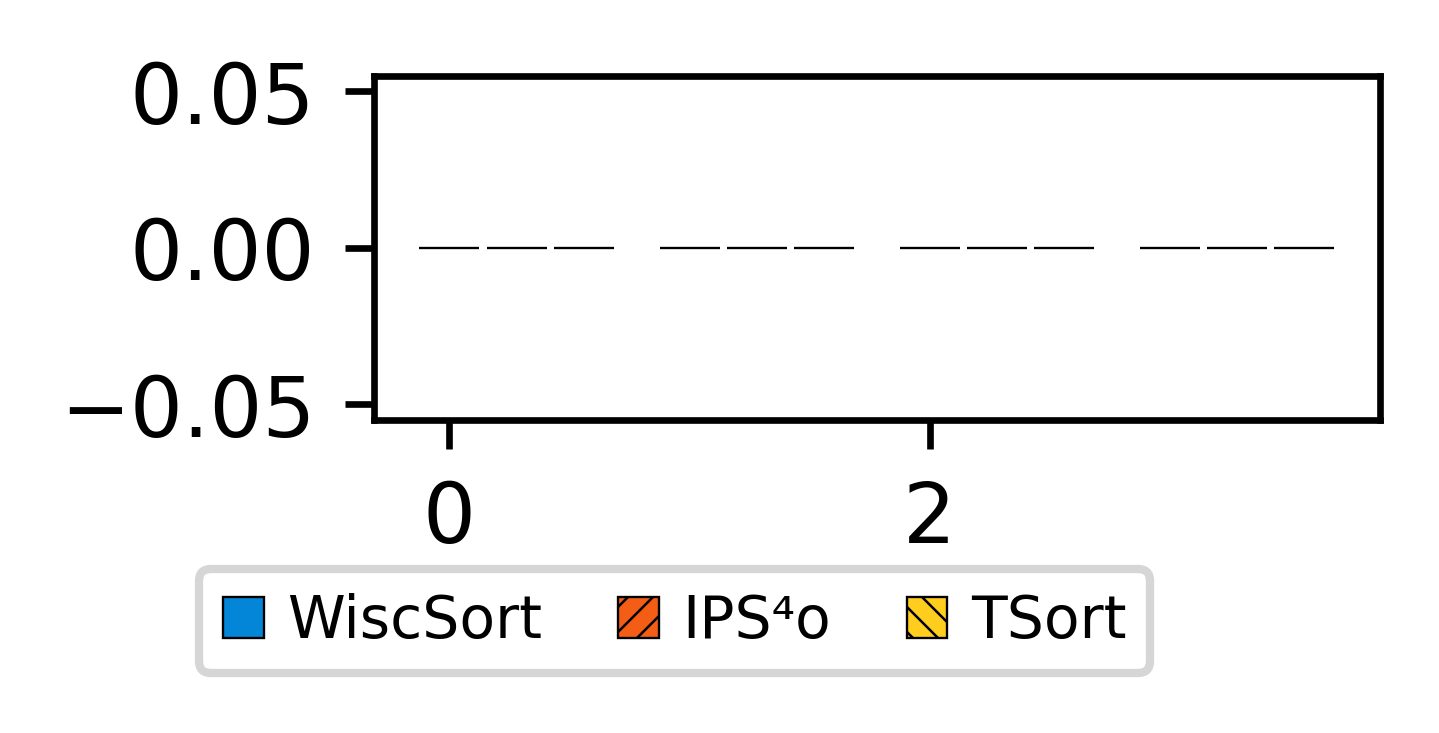

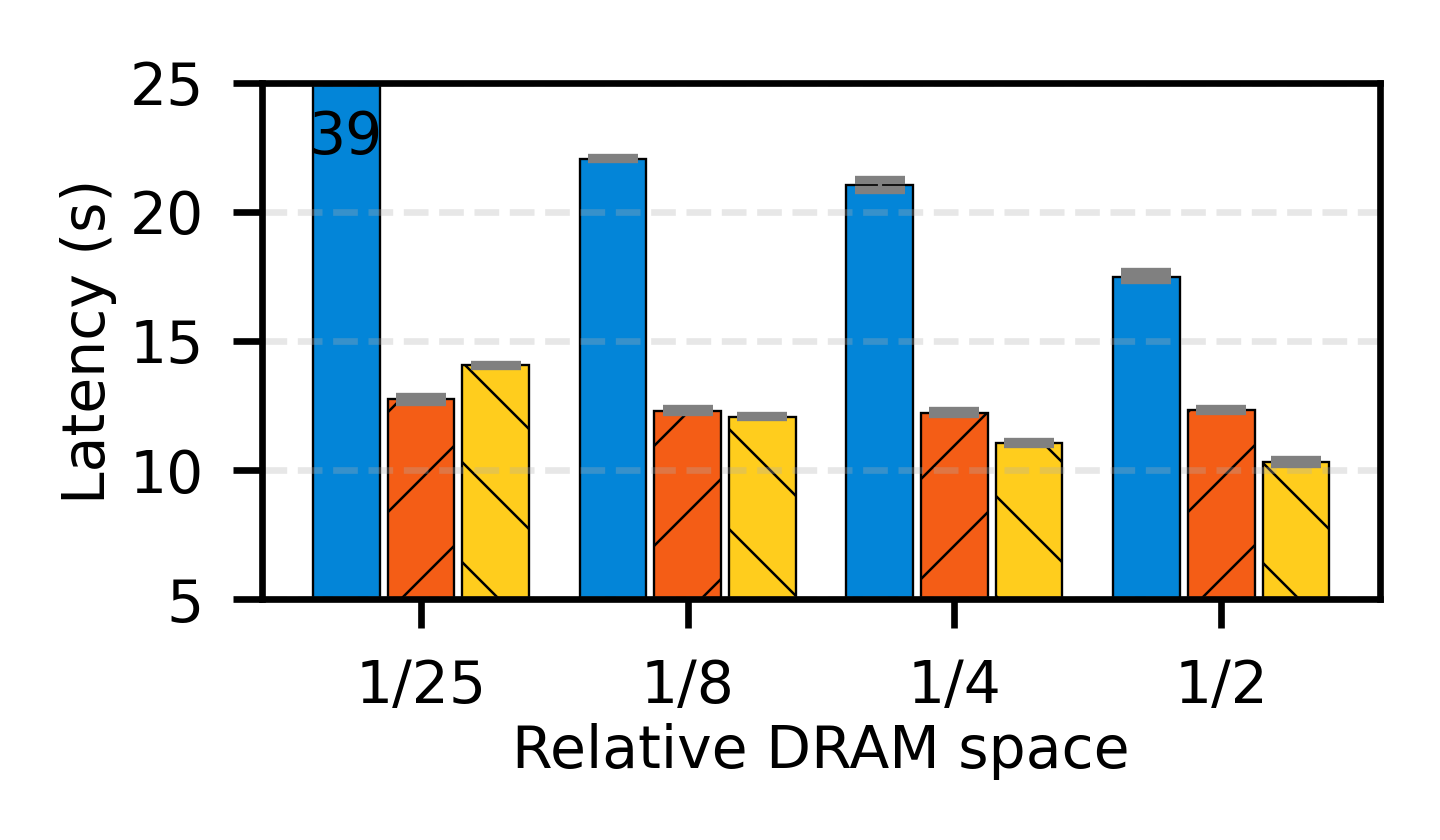

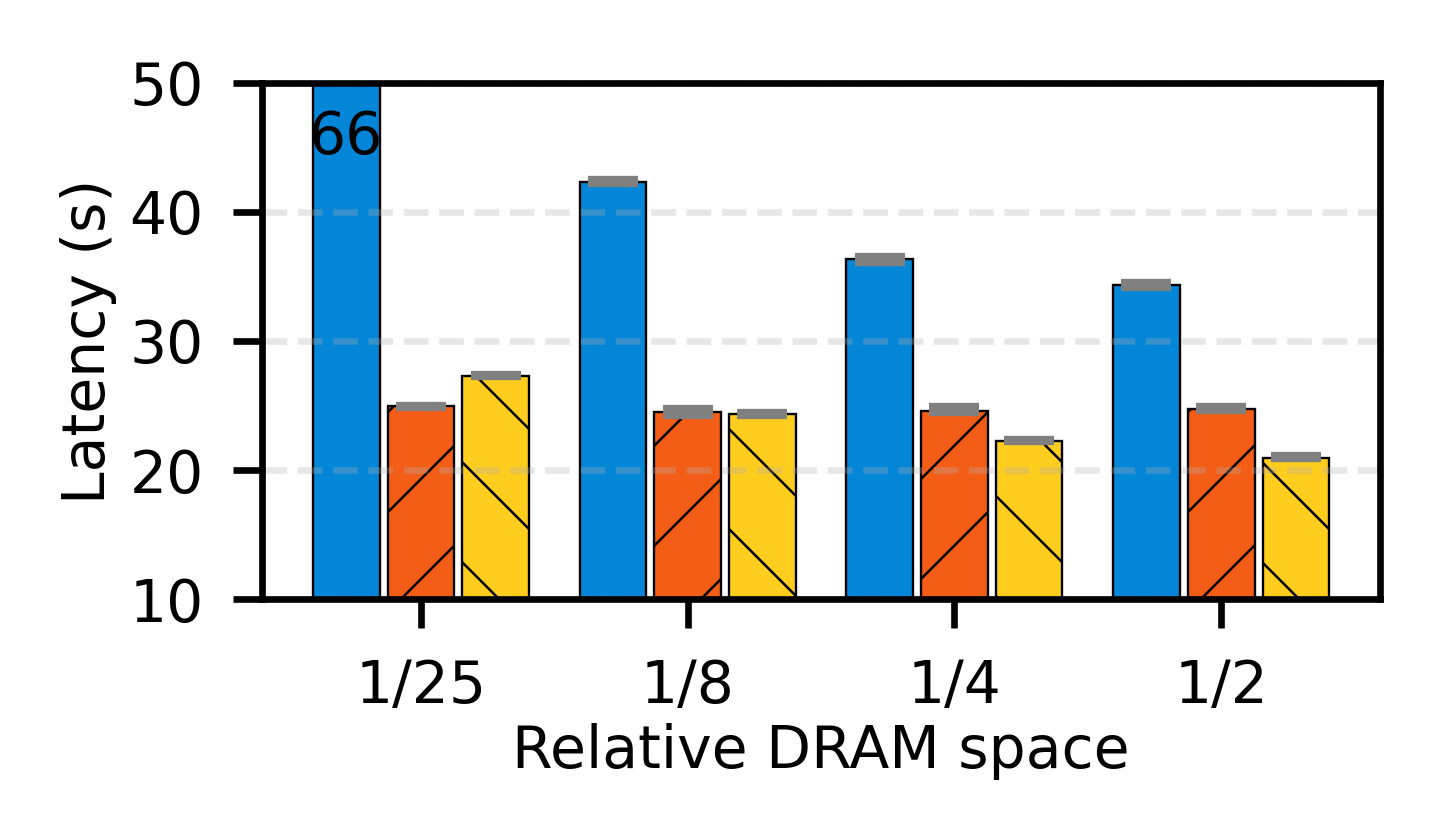

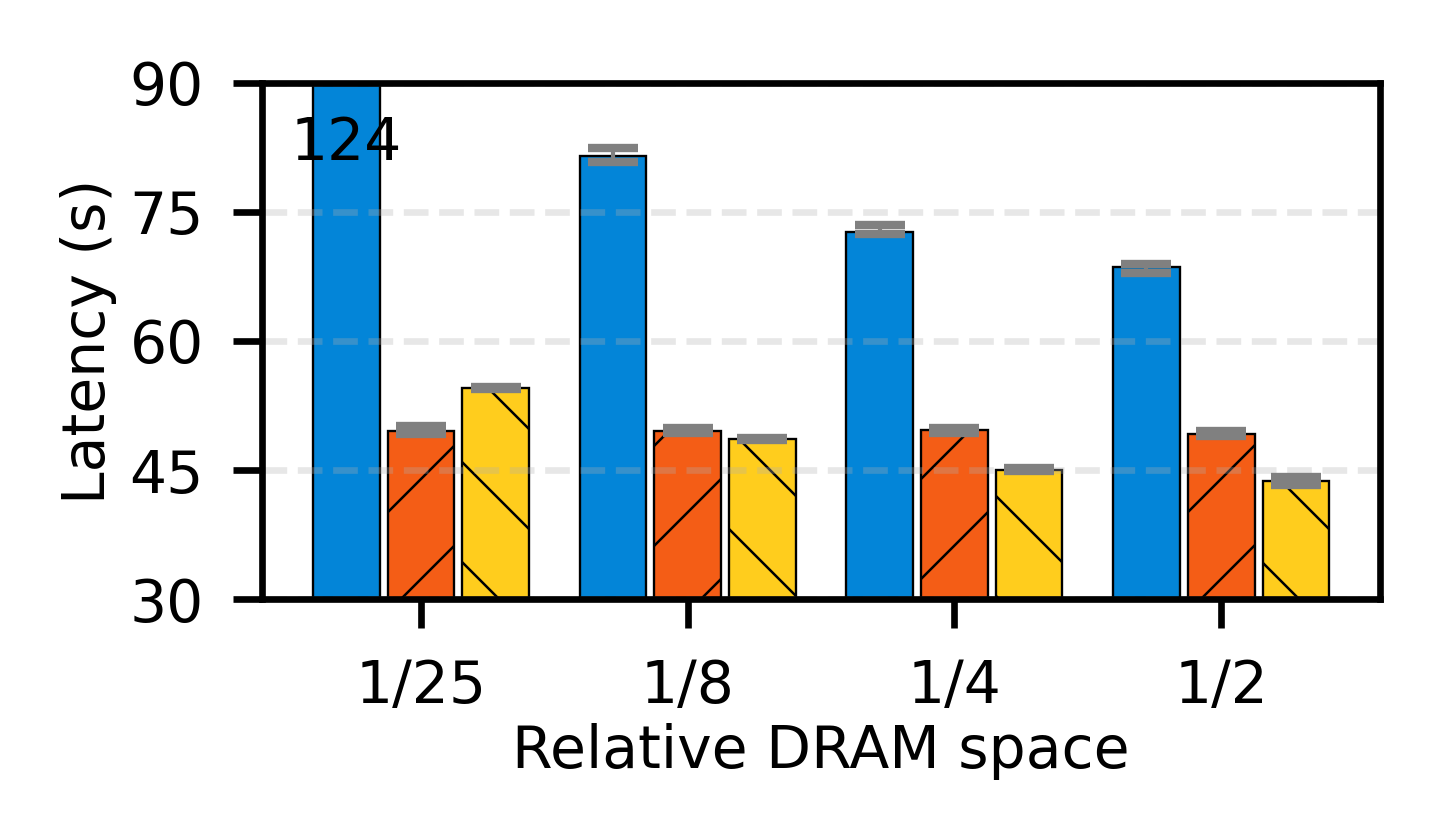

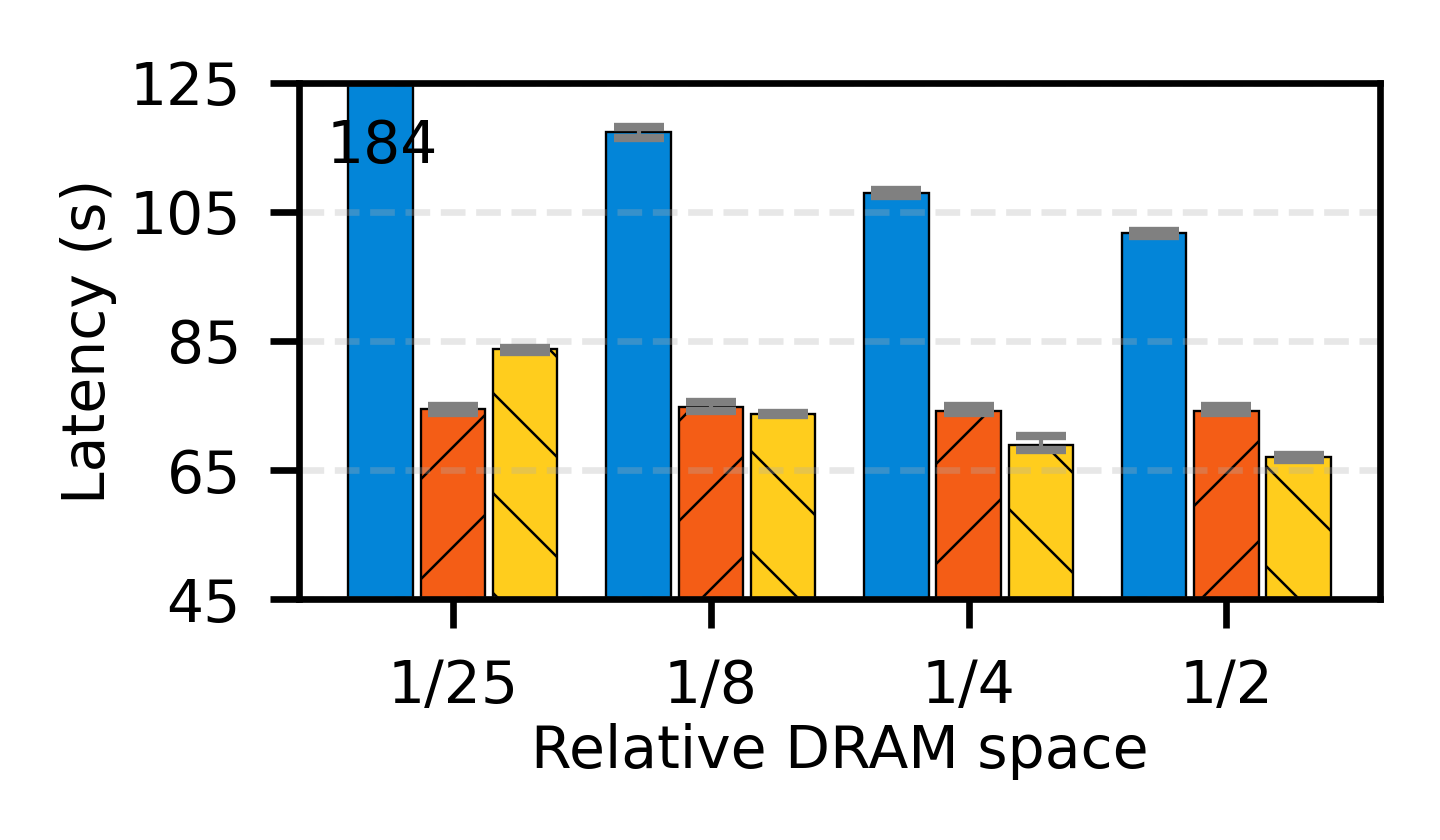

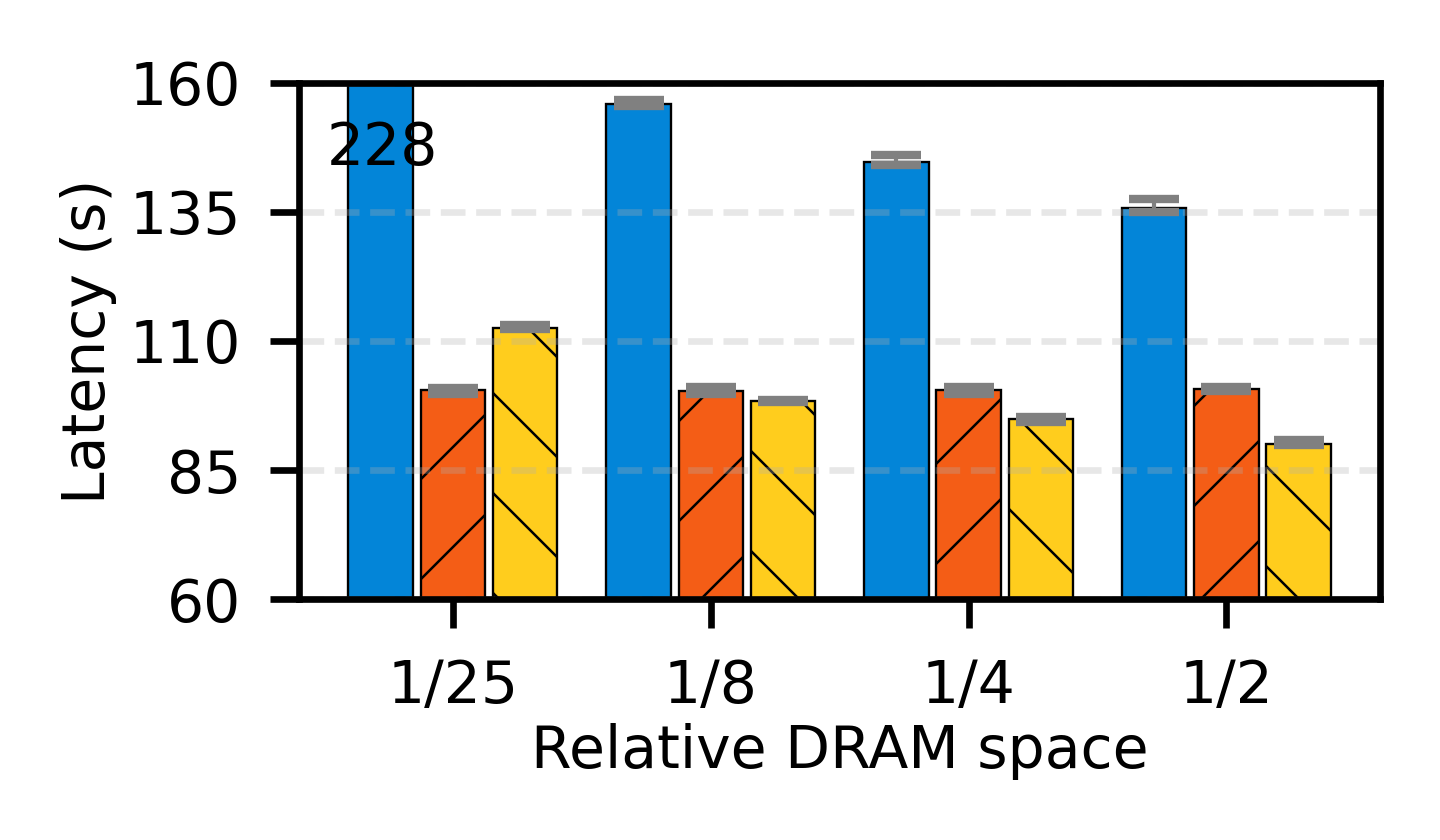

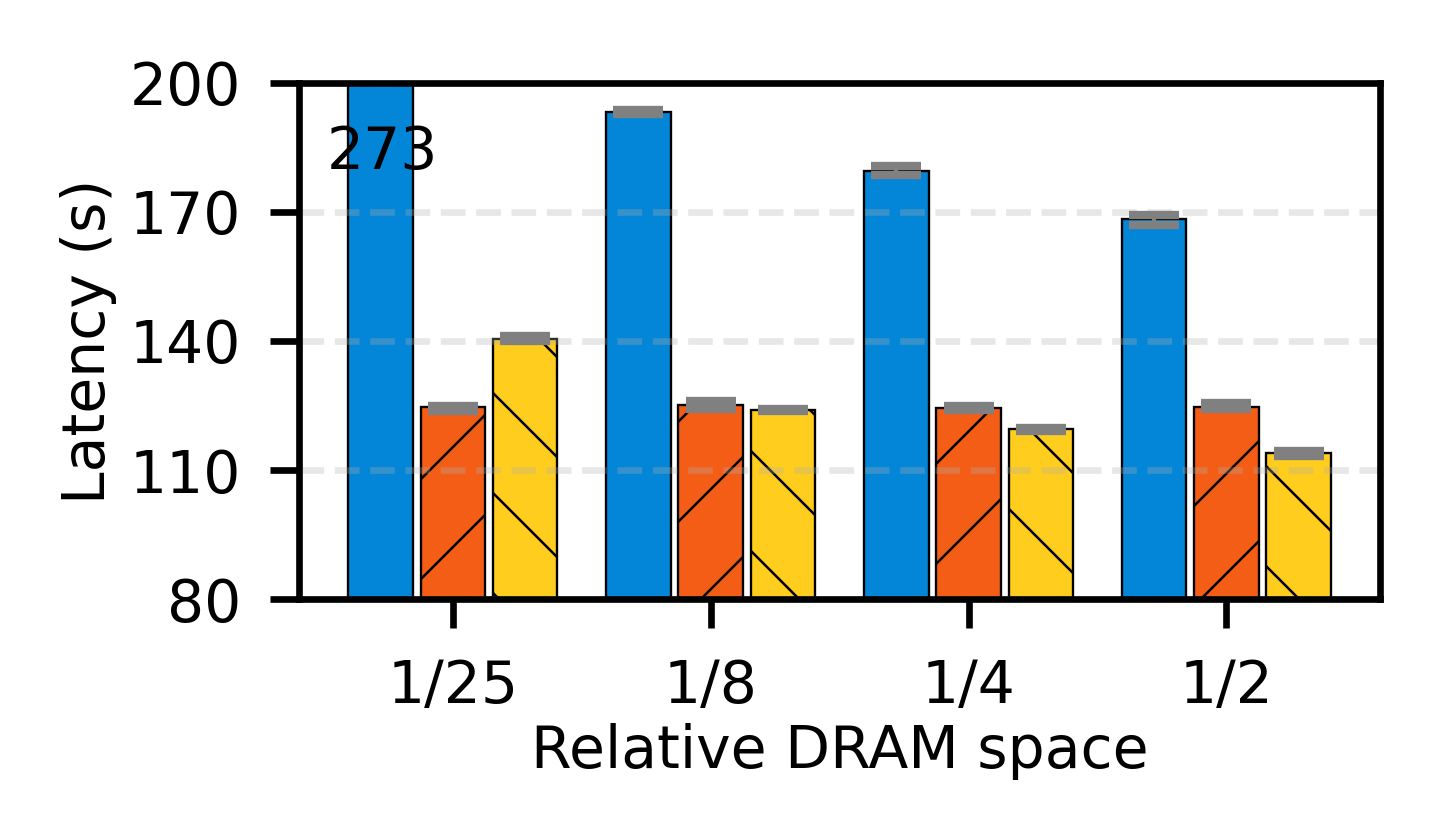

In [7]:
file = [[folder+'/'+datasize[i]+"_et_v7_brief_"+datatype[0]+"_"+date+".out" for i in range(len(datasize))],
    [folder+'/'+datasize[i]+"_wisc_r3w1_"+datatype[0]+"_"+date+".out" for i in range(len(datasize))],
    [folder+'/'+datasize[i]+"_ips4o_"+datatype[0]+"_"+date+".out" for i in range(len(datasize))]]

runall_op_seperate(file[0], file[1], file[2], 'size')

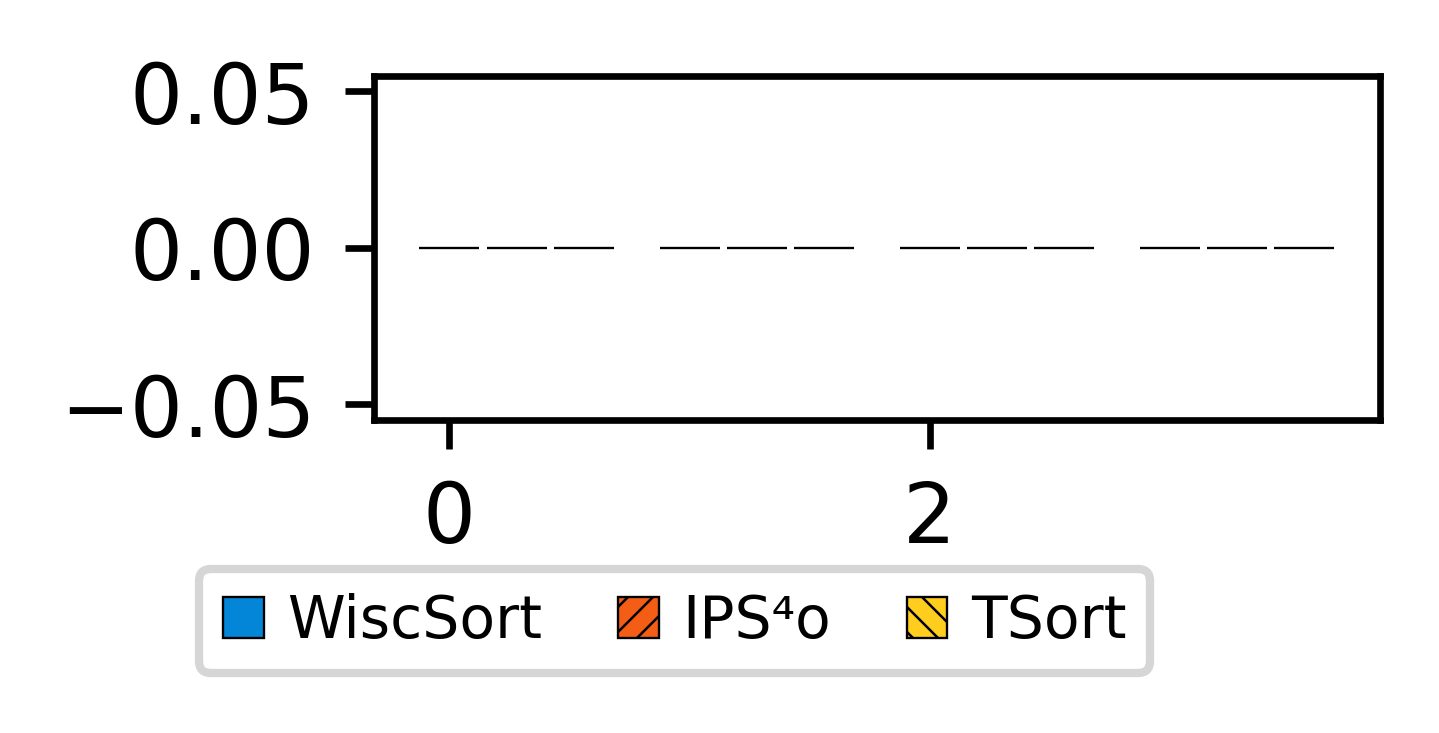

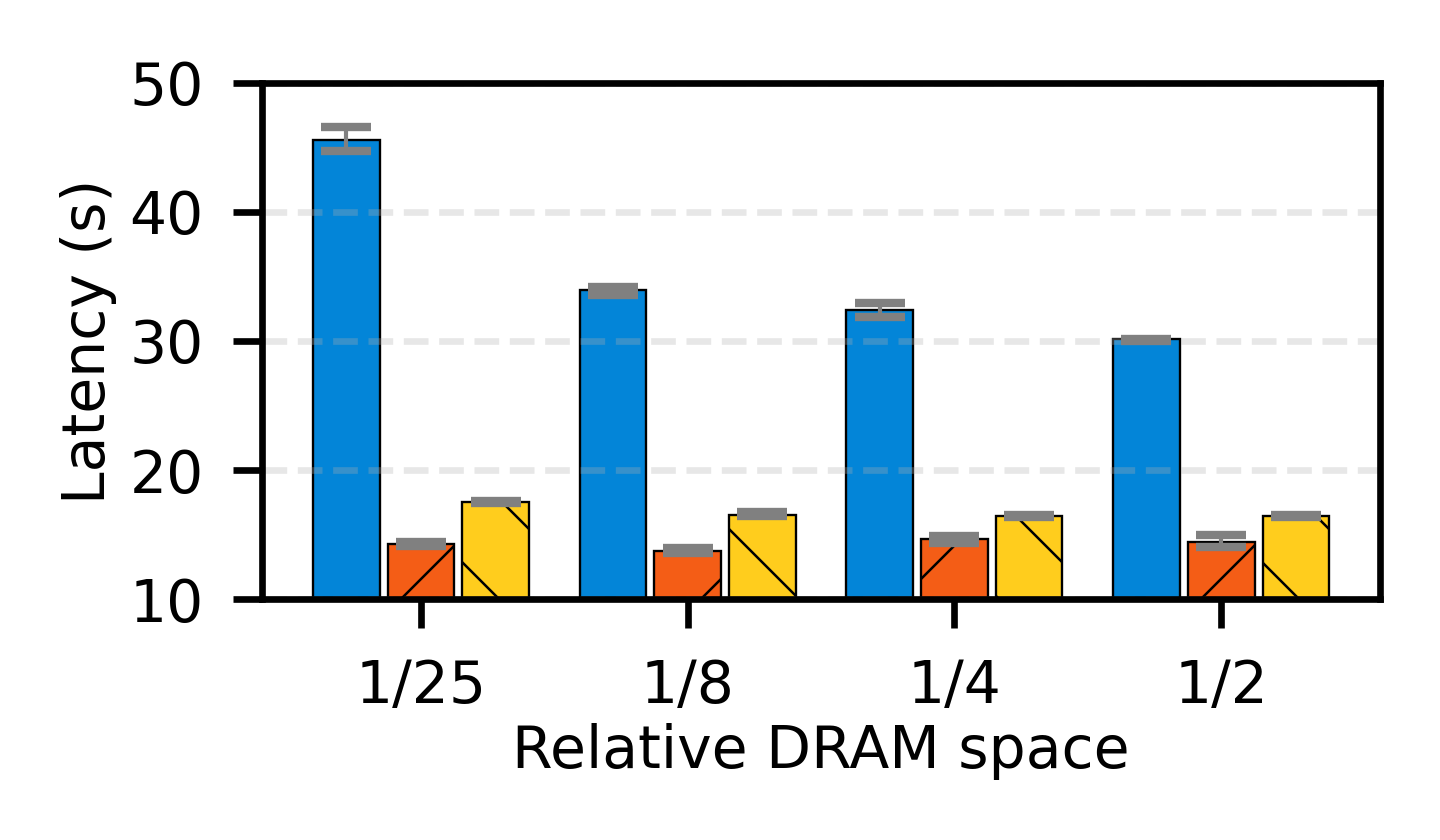

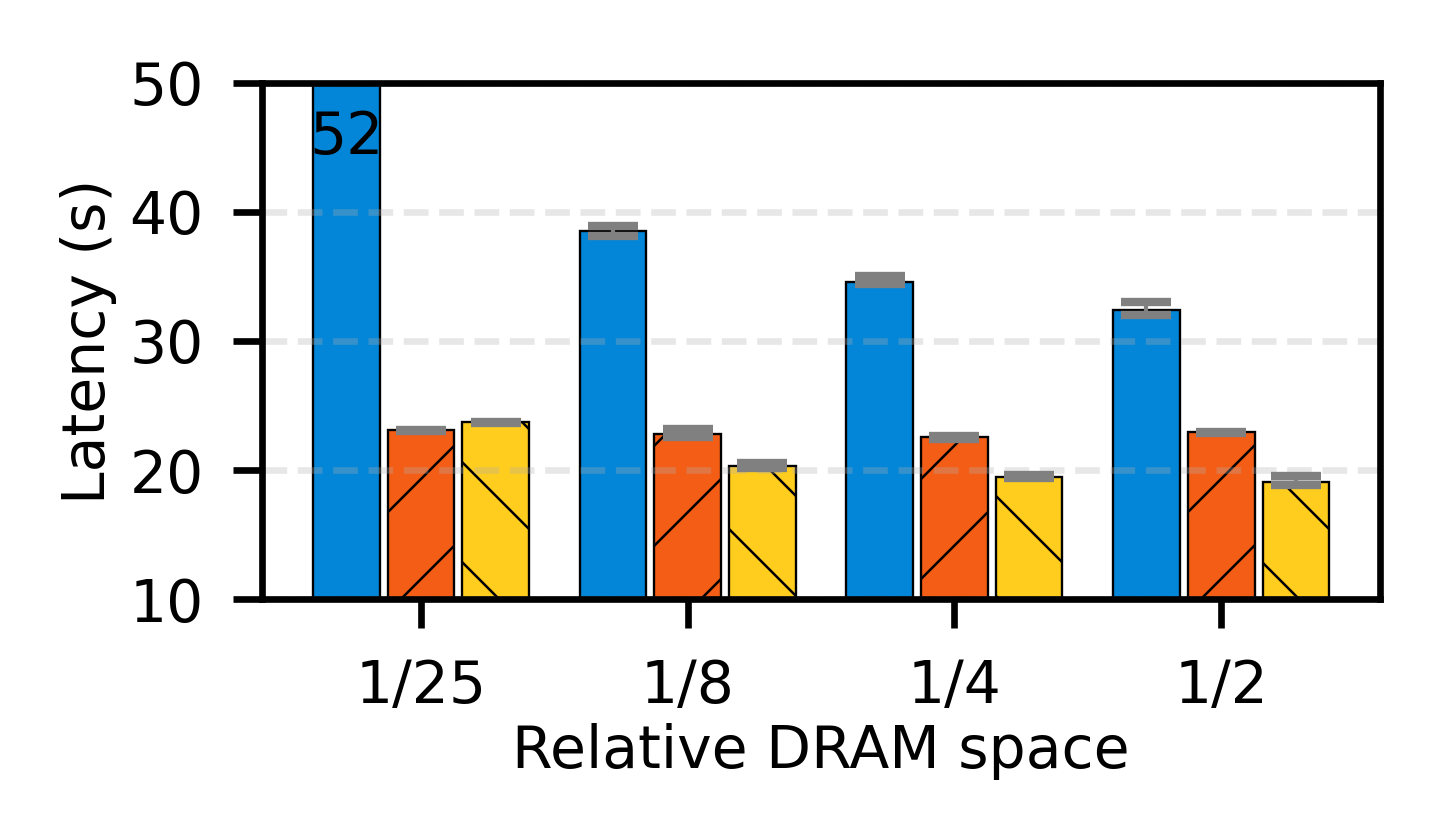

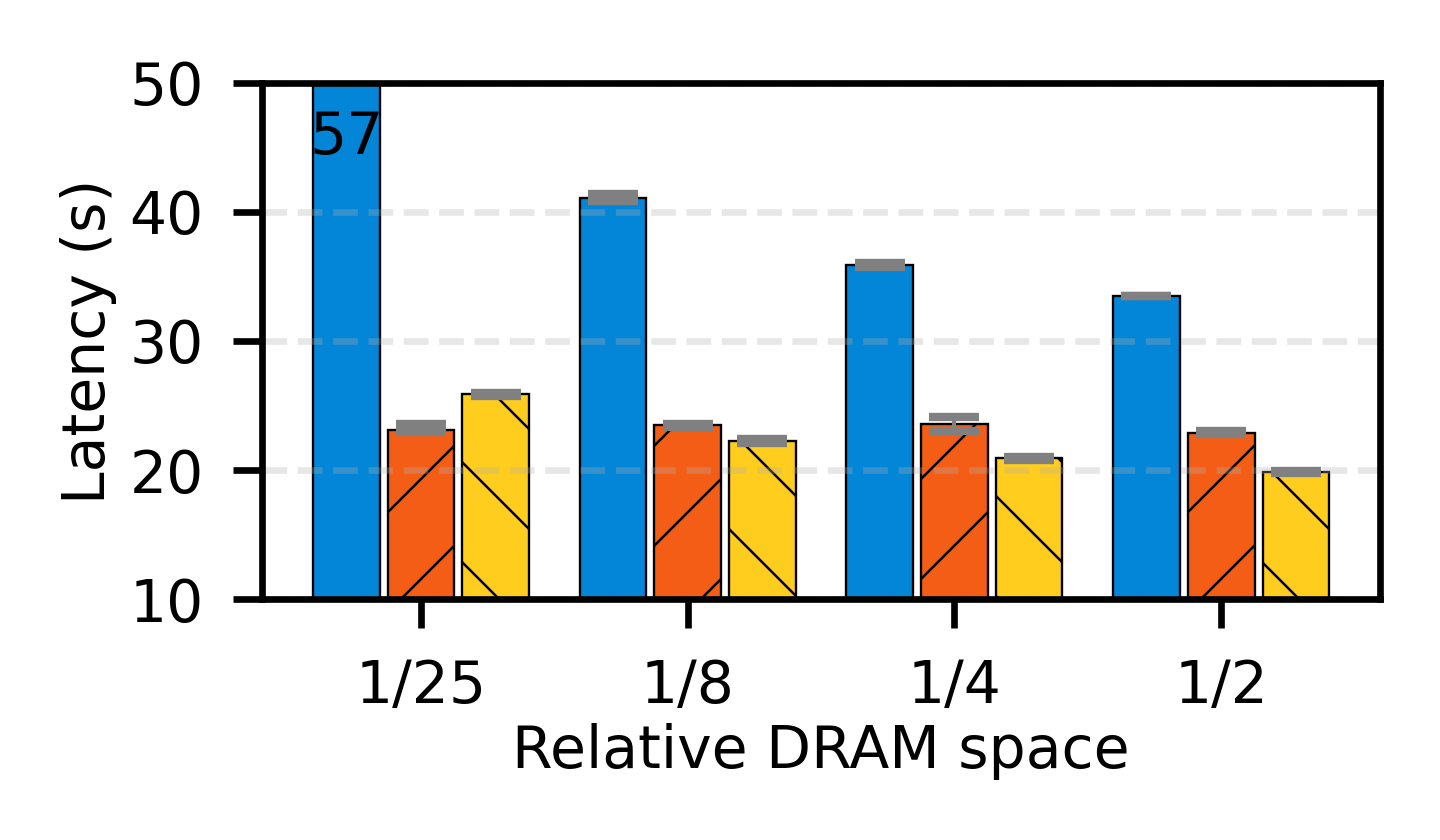

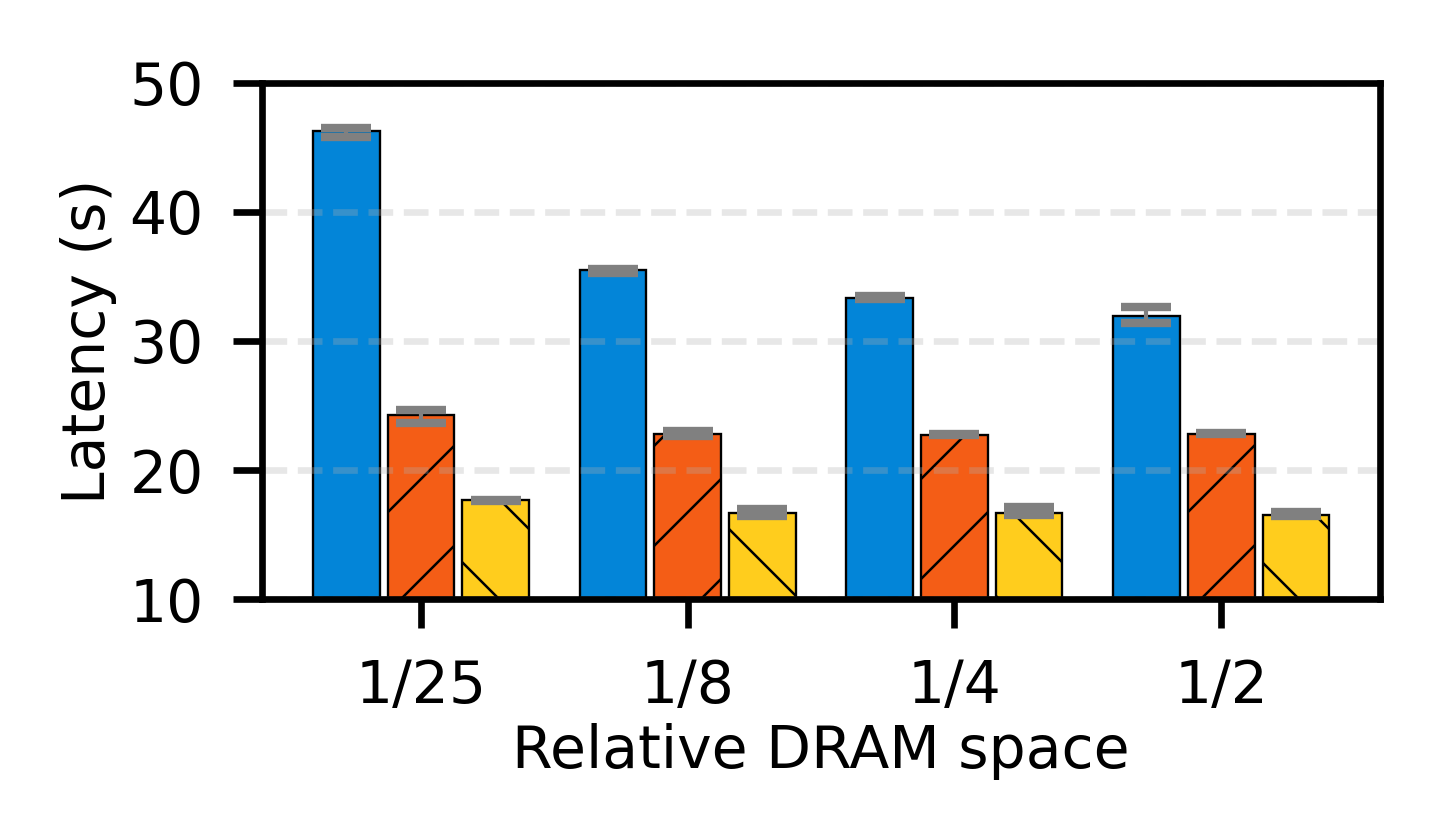

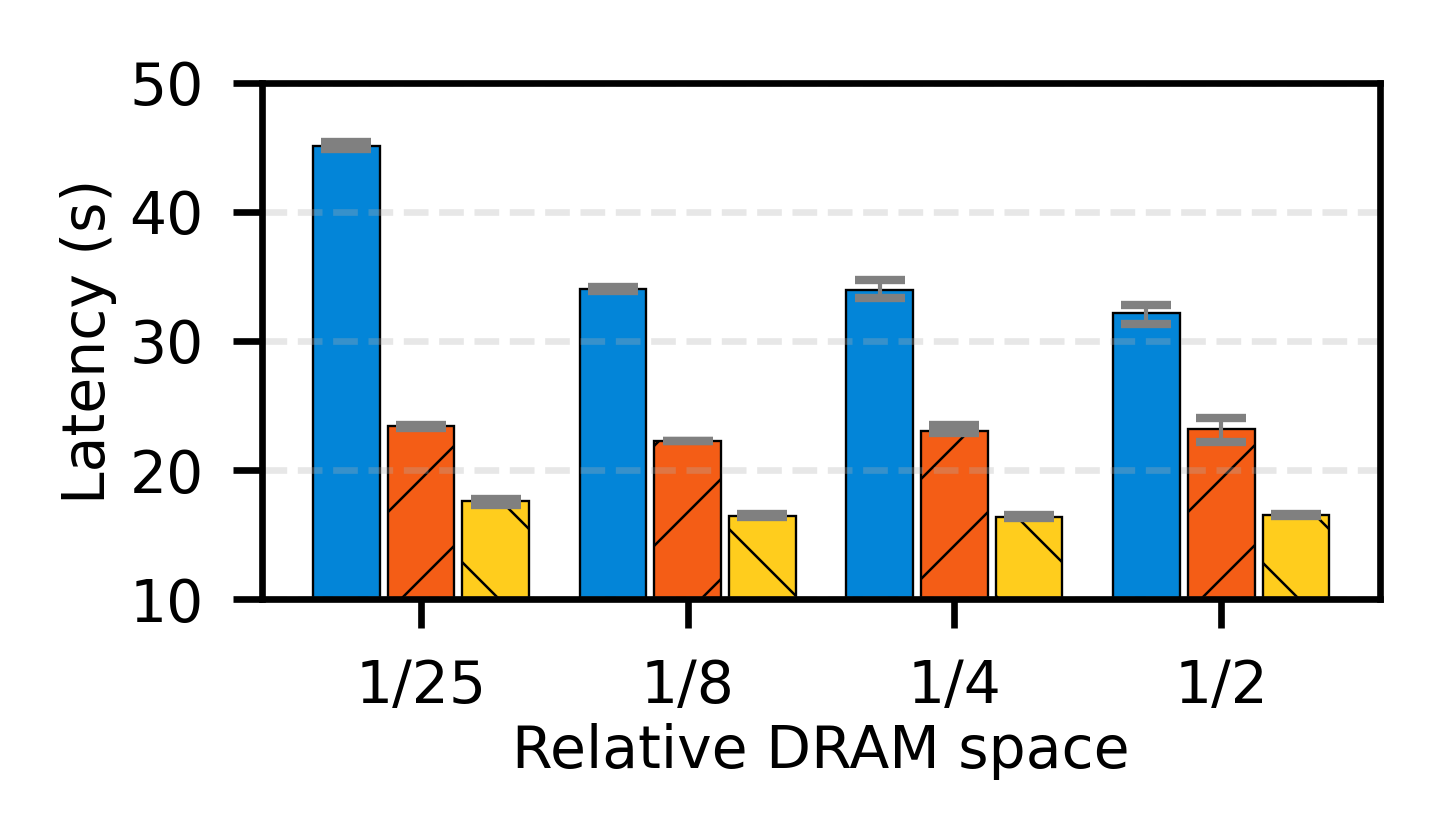

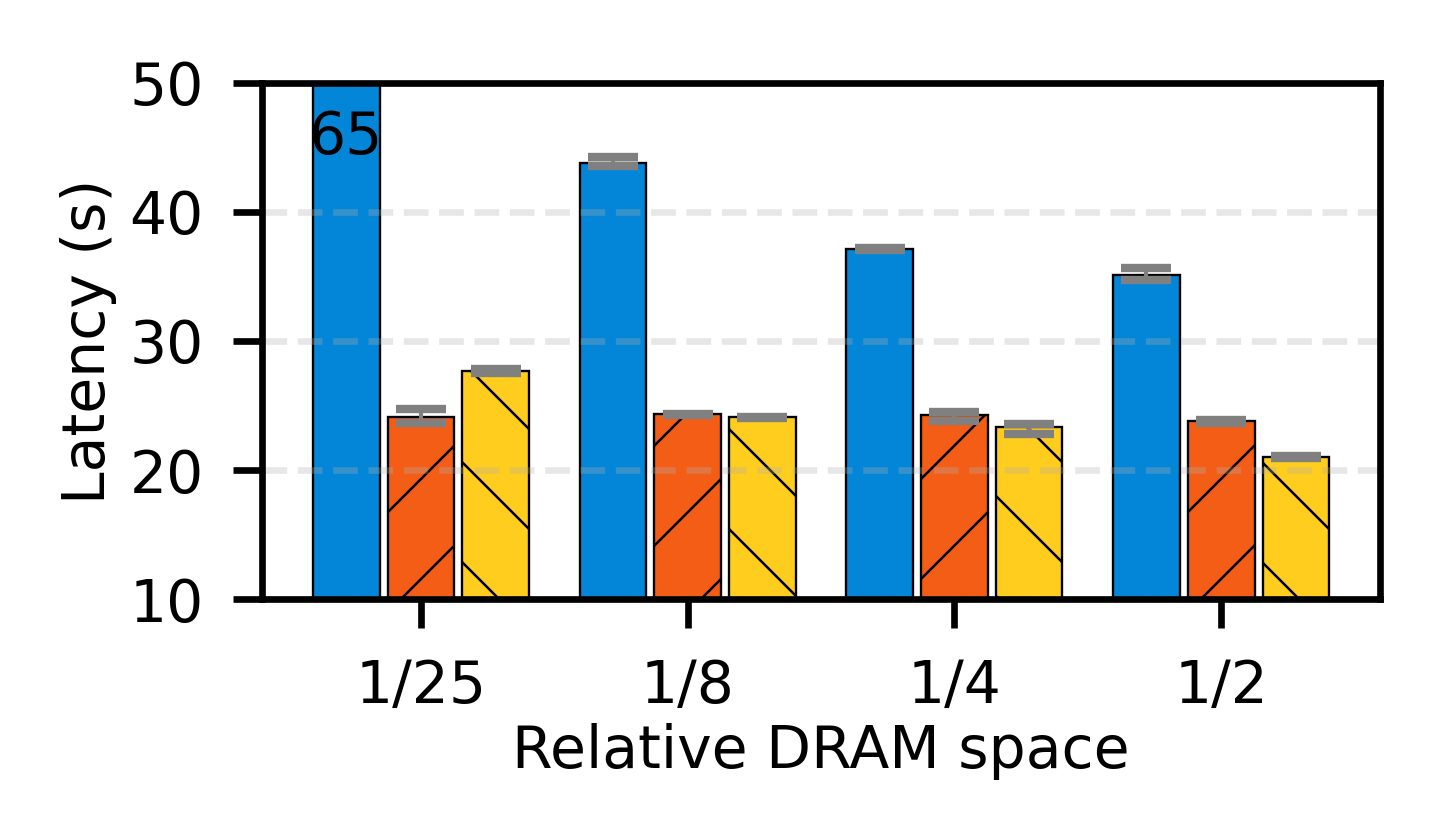

In [8]:
### skew
file = [[folder+'/'+datasize[1]+"_et_v7_brief_"+datatype[i]+"_"+date+".out" for i in range(1, len(datatype))],
    [folder+'/'+datasize[1]+"_wisc_r3w1_"+datatype[i]+"_"+date+".out" for i in range(1, len(datatype))],
    [folder+'/'+datasize[1]+"_ips4o_"+datatype[i]+"_"+date+".out" for i in range(1, len(datatype))]]

runall_op_seperate(file[0], file[1], file[2], 'type')